In [98]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
# Plotar os gráficos direto no jupyter notebook
%matplotlib inline
# Definir o tamanho e a resolução em DPI(Dots Per Inch) das figuras plotadas.
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
# Definir o estilo dos gráficos semelhantes ao ggplot
plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')

In [90]:
dados = pd.read_csv('../dados/microdados.csv', usecols=['QE_I13', 'NT_GER', 'CO_CATEGAD', 'ANO_IN_GRAD'], sep=';')
# QE_I13 recebeu bolsa, ou seja, participou de atividades de pesquisa e extensão
# NT_GER nota bruta
# CO_CATEGAD categoria da instituição, 1, 2 e 3 são públicas
# ANO_IN_GRAD ano de inicio da graduacao

In [91]:
dados = dados.rename(columns={'QE_I13': 'participou', 'NT_GER': 'nota', 'CO_CATEGAD': 'categoria', 'ANO_IN_GRAD': 'inicio'})

In [92]:
dados = dados[dados['participou'].notnull() & dados['nota'].notnull() & dados['categoria'].isin(['1', '2', '3']) & dados['inicio'].notnull()]
dados['nota'] = dados['nota'].str.replace(',', '.').astype(float)
dados['participou'] = dados['participou'].replace({'A': 'N', 'B': 'S', 'C': 'S', 'D': 'S', 'E': 'S', 'F': 'S'})
d1 = dados[['participou', 'nota']]

In [85]:
d1.groupby('participou').describe()

nota                                                   
              count       mean        std  min   25%   50%   75%   max
participou                                                            
N           79674.0  44.134015  14.236840  0.0  33.9  43.7  54.0  98.1
S           78240.0  49.506964  14.584347  0.0  39.6  49.8  59.8  96.4

In [86]:
d1.describe()

,nota
count,157914.000000
mean,46.796094
std,14.658281
min,0.000000
25%,36.400000
50%,46.800000
75%,57.100000
max,98.100000


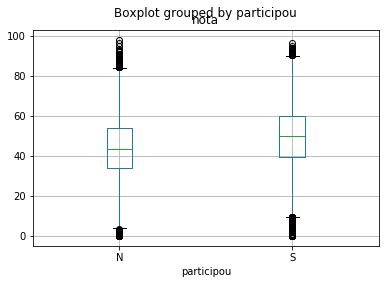

In [87]:
d1.boxplot(column='nota', by='participou')

In [93]:
dados['inicio'] = 2017 - dados['inicio']
dados[['inicio', 'participou']].groupby('participou').describe()

inicio                                              
              count      mean       std  min  25%  50%  75%   max
participou                                                       
N           79674.0  4.491829  1.914437  0.0  3.0  4.0  5.0  34.0
S           78240.0  4.373939  1.580076  0.0  3.0  4.0  5.0  35.0

In [94]:
dados['inicio'].describe()

count    157914.000000
mean          4.433419
std           1.757730
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          35.000000
Name: inicio, dtype: float64

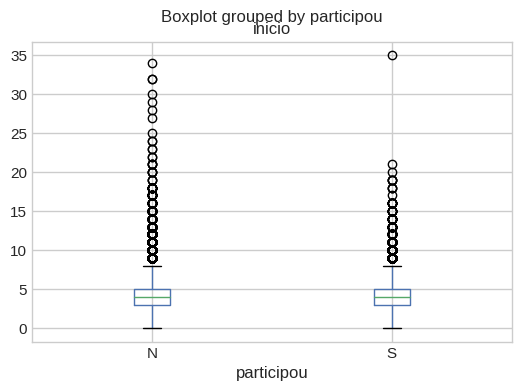

In [104]:
dados[['inicio', 'participou']].boxplot(column='inicio', by='participou')